In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.ticker as ticker
import requests 
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [30]:
url = "https://en.wikipedia.org/wiki/Internet_in_Africa"
link = requests.get(url).text

In [31]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(link, 'lxml')
print(soup)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Internet in Africa - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9f789068-8552-4713-853c-8972807f756d","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Internet_in_Africa","wgTitle":"Internet in Africa","wgCurRevisionId":974577514,"wgRevisionId":974577514,"wgArticleId":10733530,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description with empty Wikidata description","Articles with obsolete information from April 2015","All Wikipedia 

In [32]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Internet in Africa - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9f789068-8552-4713-853c-8972807f756d","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Internet_in_Africa","wgTitle":"Internet in Africa","wgCurRevisionId":974577514,"wgRevisionId":974577514,"wgArticleId":10733530,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description with empty Wikidata description","Articles with obsolete information from April 201

In [33]:
soup.title

<title>Internet in Africa - Wikipedia</title>

In [34]:
soup.title.string

'Internet in Africa - Wikipedia'

In [35]:
soup.a

<a id="top"></a>

In [36]:
soup.find_all('a')

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a href="/wiki/Wikipedia:Accuracy_dispute" title="Wikipedia:Accuracy dispute">factual accuracy</a>,
 <a class="image" href="/wiki/File:InternetPenetrationWorldMap.svg"><img alt="" class="thumbimage" data-file-height="531" data-file-width="1035" decoding="async" height="298" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/InternetPenetrationWorldMap.svg/580px-InternetPenetrationWorldMap.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/InternetPenetrationWorldMap.svg/870px-InternetPenetrationWorldMap.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/99/InternetPenetrationWorldMap.svg/1160px-InternetPenetrationWorldMap.svg.png 2x" width="580"/></a>,
 <a class="internal" href="/wiki/File:InternetPenetrationWorldMap.svg" title="Enlarge"></a>,
 <a href="/wiki/List_of_countries_by_number_of_Internet_user

In [37]:
all_link=soup.find_all('a')
for link in all_link:
    print(link.get('href'))

None
#mw-head
#searchInput
/wiki/Wikipedia:Accuracy_dispute
/wiki/File:InternetPenetrationWorldMap.svg
/wiki/File:InternetPenetrationWorldMap.svg
/wiki/List_of_countries_by_number_of_Internet_users
/wiki/International_Telecommunications_Union
#cite_note-ITU-IndividualsUsingTheInternet-1
/wiki/Digital_divide
/wiki/Internet_Service_Providers
/wiki/Host_(network)
/wiki/Internet_Exchange_Point
/wiki/Bandwidth_(computing)
/wiki/Digital_divide
/wiki/South_Africa
/wiki/Morocco
/wiki/Egypt
/wiki/Mauritius
/wiki/Seychelles
/wiki/Mobile_telephone
/wiki/Broadband_Wireless_Access
/wiki/Internet_backbone
/wiki/Bandwidth_(computing)
/wiki/International_Telecommunication_Union
/wiki/Kigali
/wiki/Rwanda
/wiki/Millennium_Development_Goals
#cite_note-2
#Current_situation
#Context
#Internet_access
#Number_of_hosts
#IXP_traffic
#Regulation
#Uses_of_Internet_in_Africa
#Evolution_and_perspectives
#Internet_availability
#Infrastructure_development
#Access
#See_also
#References
#External_links
#African_online

In [38]:
all_table=soup.find_all('table')
print(all_table)

[<table class="box-Update plainlinks metadata ambox ambox-content ambox-Update" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><img alt="Ambox current red Americas.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/42px-Ambox_current_red_Americas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/63px-Ambox_current_red_Americas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Ambox_current_red_Americas.svg/84px-Ambox_current_red_Americas.svg.png 2x" width="42"/></div></td><td class="mbox-text"><div class="mbox-text-span">This article's <b><a href="/wiki/Wikipedia:Accuracy_dispute" title="Wikipedia:Accuracy dispute">factual accuracy</a> may be compromised due to out-of-date information</b>.<span class="hide-when-compact"> Please update this article to reflect recent events or n

In [39]:
right_table=soup.find('table',class_='wikitable sortable')
right_table

<table class="wikitable sortable" style="text-align:center;">
<tbody><tr>
<th><b>Nation</b></th>
<th><br/><b>Population</b><br/><small>in thousands</small></th>
<th><b>Individuals<br/>using the internet<br/>in 2000</b><br/><small>(%)</small></th>
<th><b>Individuals<br/>using the internet<br/>in 2015</b><br/><small>(%)</small>
</th></tr>
<tr>
<td align="left"><a href="/wiki/Algeria" title="Algeria">Algeria</a></td>
<td>39,670</td>
<td>0.49</td>
<td>38.20
</td></tr>
<tr>
<td align="left"><a href="/wiki/Angola" title="Angola">Angola</a></td>
<td>25,326</td>
<td>0.11</td>
<td>12.40
</td></tr>
<tr>
<td align="left"><a href="/wiki/Benin" title="Benin">Benin</a></td>
<td>10,782</td>
<td>0.23</td>
<td>6.79
</td></tr>
<tr>
<td align="left"><a href="/wiki/Botswana" title="Botswana">Botswana</a></td>
<td>2,176</td>
<td>2.90</td>
<td>27.50
</td></tr>
<tr>
<td align="left"><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a></td>
<td>18,450</td>
<td>2.90</td>
<td>27.50
</td></tr>
<tr>

In [40]:
# Number of columns in the table
for row in right_table.findAll("tr"):
    cells = row.findAll('td')

len(cells)


4

In [41]:
# number of rows in the table including header
rows = right_table.findAll("tr")
len(rows)

52

In [42]:

# header attributes of the table
header = [th.text.rstrip() for th in rows[0].find_all('th')]
print(header)
print('------------')
print(len(header))

['Nation', 'Populationin thousands', 'Individualsusing the internetin 2000(%)', 'Individualsusing the internetin 2015(%)']
------------
4


In [43]:
# 
lst_data = []
for row in rows[1:]:
            data = [d.text.rstrip() for d in row.find_all('td')]
            lst_data.append(data)

In [44]:
# select also works as find_all
lst_data1 = []
for row in rows[1:]:
            data = [d.text.rstrip() for d in row.select('td')]
            lst_data1.append(data)

In [45]:
# sample records
lst_data1[0:4]
lst_data[0:4]

[['Algeria', '39,670', '0.49', '38.20'],
 ['Angola', '25,326', '0.11', '12.40'],
 ['Benin', '10,782', '0.23', '6.79'],
 ['Botswana', '2,176', '2.90', '27.50']]

In [46]:

# length of each record
len(lst_data1[0])

4

In [47]:
# html of each table record

list_row = []
for row in right_table.findAll("tr"):
    list_row.append(row)

    
print('Number of row :',len(list_row))
print('----------------')
print(list_row[1])
print('----------------')
print('Second Attribute is has link reference')
print('----------------')
print(list_row[1].findAll('th'))
print('----------------')
print(list_row[1].find('a').text)

Number of row : 52
----------------
<tr>
<td align="left"><a href="/wiki/Algeria" title="Algeria">Algeria</a></td>
<td>39,670</td>
<td>0.49</td>
<td>38.20
</td></tr>
----------------
Second Attribute is has link reference
----------------
[]
----------------
Algeria


In [48]:
#Scrap the data and append to respective lists

c1=[]
c2=[]
c3=[]
c4=[]

for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells)==4: #Only extract table body not heading
        c1.append(cells[0].find('a').text)   # fetch the text of the url in td tag
        c2.append(cells[1].find(text=True))   
        c3.append(cells[2].find(text=True))
        c4.append(cells[3].find(text=True))
        
        

In [49]:

# create a dictionary
d = dict([(x,0) for x in header])
d

{'Nation': 0,
 'Populationin thousands': 0,
 'Individualsusing the internetin 2000(%)': 0,
 'Individualsusing the internetin 2015(%)': 0}

In [50]:
# append dictionary with corresponding data list.
d['Nation'] = c1
d['Population in thousands']= c2
d['Individuals using the internet in 2000(%)']=c3
d['Individuals using the internet in 2015(%)']=c4


In [51]:
# convert dict to DataFrame
df_table = pd.DataFrame(d)

# Top 5 records
df_table.head(5)

,Nation,Populationin thousands,Individualsusing the internetin 2000(%),Individualsusing the internetin 2015(%),Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%)
0,Algeria,0,0,0,"39,670",0.49,38.20\n
1,Angola,0,0,0,"25,326",0.11,12.40\n
2,Benin,0,0,0,"10,782",0.23,6.79\n
3,Botswana,0,0,0,"2,176",2.90,27.50\n
4,Burkina Faso,0,0,0,"18,450",2.90,27.50\n


In [52]:
df_table.drop(df_table.iloc[:, 1:4], inplace = True, axis = 1)

In [53]:
df_table

,Nation,Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%)
0,Algeria,"39,670",0.49,38.20\n
1,Angola,"25,326",0.11,12.40\n
2,Benin,"10,782",0.23,6.79\n
3,Botswana,"2,176",2.90,27.50\n
4,Burkina Faso,"18,450",2.90,27.50\n
5,Burundi,"9,824",0.08,4.87\n
6,Cameroon,"21,918",0.25,20.68\n
7,Cape Verde,525,1.82,43.02\n
8,Central AfricanRepublic,"4,900",0.05,4.56\n
9,Chad,13675,0.04,2.70\n


In [54]:
df_table.to_csv('df_table.csv')

In [55]:
df_table.head()

,Nation,Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%)
0,Algeria,"39,670",0.49,38.20\n
1,Angola,"25,326",0.11,12.40\n
2,Benin,"10,782",0.23,6.79\n
3,Botswana,"2,176",2.90,27.50\n
4,Burkina Faso,"18,450",2.90,27.50\n


In [56]:
df_table = df_table['Individuals using the internet in 2015(%)'].replace('\n',"", regex = True, inplace = True).astype(float)

AttributeError: 'NoneType' object has no attribute 'astype'

In [57]:
df_table = df_table['Individuals using the internet in 2015(%)'].replace('\n',"", regex = True, inplace = True).astype(float)

AttributeError: 'NoneType' object has no attribute 'astype'

In [58]:
df_table.head()

,Nation,Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%)
0,Algeria,"39,670",0.49,38.20
1,Angola,"25,326",0.11,12.40
2,Benin,"10,782",0.23,6.79
3,Botswana,"2,176",2.90,27.50
4,Burkina Faso,"18,450",2.90,27.50


In [59]:
df_table['Individuals using the internet in 2015(%)'].replace(regex=True, inplace=True,to_replace=r'[^0-9.\n]', value=r"]df_table['Individuals using the internet in 2015(%)'].astype(float64)

SyntaxError: EOL while scanning string literal (<ipython-input-59-f838cfcd0bd9>, line 1)

In [60]:
df_table.head()

,Nation,Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%)
0,Algeria,"39,670",0.49,38.20
1,Angola,"25,326",0.11,12.40
2,Benin,"10,782",0.23,6.79
3,Botswana,"2,176",2.90,27.50
4,Burkina Faso,"18,450",2.90,27.50


In [61]:
df_table.describe()

,Nation,Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%)
count,51,51,51,51
unique,51,51,35,48
top,Kenya,17796,0.19,5.36
freq,1,1,4,2


In [62]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Nation                                     51 non-null     object
 1   Population in thousands                    51 non-null     object
 2   Individuals using the internet in 2000(%)  51 non-null     object
 3   Individuals using the internet in 2015(%)  51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [63]:
df_table['Individuals using the internet in 2000(%)'] = df_table['Individuals using the internet in 2000(%)'].str.replace(r'\D','').astype('float64')
df_individual.head()


NameError: name 'df_individual' is not defined

In [64]:
 df_table['Population in thousands']= df_table['Population in thousands'].str.replace(r'\D','').astype('int64')
df_population.head()


NameError: name 'df_population' is not defined

In [65]:
df_table['Individuals using the internet in 2015(%)'] = df_table['Individuals using the internet in 2015(%)'].str.replace(r'\D','').astype('float64')
df_individual2015.head()

NameError: name 'df_individual2015' is not defined

In [66]:
df_table['Individuals using the internet in 2000(%)'] = (df_table['Individuals using the internet in 2000(%)'])/100

In [67]:
df_table['Individuals using the internet in 2015(%)'] = (df_table['Individuals using the internet in 2015(%)'])/100

In [68]:
df_table.head()

,Nation,Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%)
0,Algeria,39670,0.49,38.20
1,Angola,25326,0.11,12.40
2,Benin,10782,0.23,6.79
3,Botswana,2176,2.90,27.50
4,Burkina Faso,18450,2.90,27.50


In [69]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Nation                                     51 non-null     object 
 1   Population in thousands                    51 non-null     int64  
 2   Individuals using the internet in 2000(%)  51 non-null     float64
 3   Individuals using the internet in 2015(%)  51 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [70]:
df_table['Individual2000'] = df_table['Population in thousands'] * df_table['Individuals using the internet in 2000(%)']
df_table 

,Nation,Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%),Individual2000
0,Algeria,39670,0.49,38.20,1.943830e+04
1,Angola,25326,0.11,12.40,2.785860e+03
2,Benin,10782,0.23,6.79,2.479860e+03
3,Botswana,2176,2.90,27.50,6.310400e+03
4,Burkina Faso,18450,2.90,27.50,5.350500e+04
5,Burundi,9824,0.08,4.87,7.859200e+02
6,Cameroon,21918,0.25,20.68,5.479500e+03
7,Cape Verde,525,1.82,43.02,9.555000e+02
8,Central AfricanRepublic,4900,0.05,4.56,2.450000e+02
9,Chad,13675,0.04,2.70,5.470000e+02


In [71]:
df_table['Individual2015'] = df_table['Population in thousands'] * df_table['Individuals using the internet in 2015(%)']
df_table

,Nation,Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%),Individual2000,Individual2015
0,Algeria,39670,0.49,38.20,1.943830e+04,1.515394e+06
1,Angola,25326,0.11,12.40,2.785860e+03,3.140424e+05
2,Benin,10782,0.23,6.79,2.479860e+03,7.320978e+04
3,Botswana,2176,2.90,27.50,6.310400e+03,5.984000e+04
4,Burkina Faso,18450,2.90,27.50,5.350500e+04,5.073750e+05
5,Burundi,9824,0.08,4.87,7.859200e+02,4.784288e+04
6,Cameroon,21918,0.25,20.68,5.479500e+03,4.532642e+05
7,Cape Verde,525,1.82,43.02,9.555000e+02,2.258550e+04
8,Central AfricanRepublic,4900,0.05,4.56,2.450000e+02,2.234400e+04
9,Chad,13675,0.04,2.70,5.470000e+02,3.692250e+04


In [72]:
df_table['growthinternet'] = df_table['Individual2015'] - df_table['Individual2000']
df_table

,Nation,Population in thousands,Individuals using the internet in 2000(%),Individuals using the internet in 2015(%),Individual2000,Individual2015,growthinternet
0,Algeria,39670,0.49,38.20,1.943830e+04,1.515394e+06,1.495956e+06
1,Angola,25326,0.11,12.40,2.785860e+03,3.140424e+05,3.112565e+05
2,Benin,10782,0.23,6.79,2.479860e+03,7.320978e+04,7.072992e+04
3,Botswana,2176,2.90,27.50,6.310400e+03,5.984000e+04,5.352960e+04
4,Burkina Faso,18450,2.90,27.50,5.350500e+04,5.073750e+05,4.538700e+05
5,Burundi,9824,0.08,4.87,7.859200e+02,4.784288e+04,4.705696e+04
6,Cameroon,21918,0.25,20.68,5.479500e+03,4.532642e+05,4.477847e+05
7,Cape Verde,525,1.82,43.02,9.555000e+02,2.258550e+04,2.163000e+04
8,Central AfricanRepublic,4900,0.05,4.56,2.450000e+02,2.234400e+04,2.209900e+04
9,Chad,13675,0.04,2.70,5.470000e+02,3.692250e+04,3.637550e+04


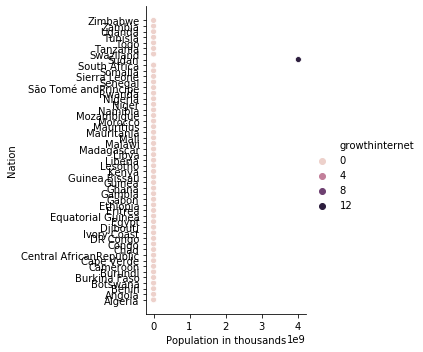

In [73]:
sns.relplot(x='Population in thousands', y='Nation', hue='growthinternet', data=df_table)

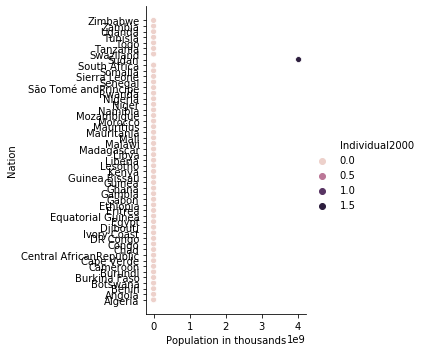

In [74]:
sns.relplot(x='Population in thousands', y='Nation', hue='Individual2000', data=df_table)

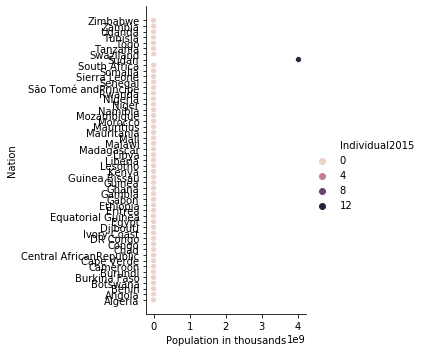

In [75]:
sns.relplot(x='Population in thousands', y='Nation', hue='Individual2015', data=df_table)

In [76]:
import plotly.express as px

In [84]:
import plotly.express as px
fig = px.line(df_table, x='Population in thousands', y='growthinternet', color='Nation', title='Africa internet usage growth rate')
fig.show()

In [80]:
px.choropleth(df_table, locations='Nation', color = 'growthinternet', hover_name = 'Nation',
              color_continuous_scale = px.colors.sequential.Viridis, scope = 'africa', locationmode = 'country names', title='Africa Internet Growth Rate')

Sudan has the highest increase in internet usuage compared to other countries in Africa


In [81]:
px.choropleth(df_table, locations='Nation', color = 'Individuals using the internet in 2000(%)', hover_name = 'Nation',
              color_continuous_scale = px.colors.sequential.Viridis, scope = 'africa', locationmode = 'country names', title='Africa individual internet usage in 2000')

South Africa has the highest internet usage in 2012


In [82]:
px.choropleth(df_table, locations='Nation', color = 'Individuals using the internet in 2015(%)', hover_name = 'Nation',
              color_continuous_scale = px.colors.sequential.Viridis, scope = 'africa', locationmode = 'country names', title='Africa individual internet usage in 2000')

In [ ]:
Morroco, Somalia and south Africa has the highest individuals using internet in Africa in 2015 
